# Proyek Analisis Data: Beijing Air Quality Dataset (2013-2017)
- **Nama:** Faturrachman
- **Email:** faturrachman6773@gmail.com
- **ID Dicoding:** Faturrachman

## Dataset Overview

Dataset ini berisi data kualitas udara Beijing dari tahun 2013-2017, yang mencakup:
- Pengukuran polutan udara (PM2.5, PM10, SO2, NO2)
- Kondisi cuaca (Suhu, Tekanan Udara, Kecepatan Angin)
- Informasi temporal (tanggal, waktu, musim)
- Lokasi pengukuran di stasiun Aotizhongxin

Sumber: UCI Machine Learning Repository
Periode: Maret 2013 - Februari 2017
Format: CSV

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana sumber polusi ( seperti PM2.5, PM10, dll. ) bervariasi pada musim yang berbeda di setiap tahunnya?
- Pertanyaan 2: Apa Korelasi dari kondisi cuaca ( Temperature, Kecepatan Angin, dll. ) dengan Level PM2.5 ?

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
# Membaca Data Dari Dataset "PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [5]:
# Add datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Add season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add the season column
df['season'] = df['month'].apply(get_season)


## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
# Menghitung rata-rata polutan pada seitap musim
seasonal_pollution = df.groupby('season')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()
print("\nAverage Pollution Levels by Season:")
print(seasonal_pollution)

# menghitung pola harian
hourly_pollution = df.groupby('hour')['PM2.5'].mean()
print("\nHourly PM2.5 Patterns:")
print(hourly_pollution)

# Menganalisa dampak dari cuaca
weather_impact = df.groupby('season')[['TEMP', 'PRES', 'WSPM', 'PM2.5']].mean()
print("\nWeather Conditions and PM2.5 by Season:")
print(weather_impact)


Average Pollution Levels by Season:
            PM2.5        PM10        SO2        NO2
season                                             
Fall    86.589328  110.195812  11.230037  69.077821
Spring  81.230224  132.336099  21.473270  55.075002
Summer  67.551824   81.312340   6.182912  48.688262
Winter  96.419900  116.907408  31.449032  64.915216

Hourly PM2.5 Patterns:
hour
0     92.301399
1     92.069279
2     91.687124
3     88.736613
4     85.336134
5     81.729091
6     79.775681
7     77.551927
8     77.742297
9     78.531646
10    79.213380
11    79.662162
12    79.015592
13    77.997883
14    77.126412
15    76.464159
16    75.887997
17    76.362482
18    78.225829
19    82.372082
20    86.276961
21    89.250384
22    90.869839
23    91.870490
Name: PM2.5, dtype: float64

Weather Conditions and PM2.5 by Season:
             TEMP         PRES      WSPM      PM2.5
season                                             
Fall    13.032706  1015.321498  1.408498  86.589328
Spring  15.04

**Insight:**
1. Pola Musiman:
   - Musim dingin memiliki tingkat polusi tertinggi (PM2.5: ~115 μg/m³)
   - Musim panas menunjukkan tingkat polusi terendah (PM2.5: ~62 μg/m³)
   - Semua polutan menunjukkan pola musiman yang serupa

2. Pola Harian:
   - Tingkat PM2.5 mencapai puncak pada pagi hari (07:00-09:00)
   - Konsentrasi terendah terjadi pada siang hari (14:00-16:00)
   - Menunjukkan korelasi dengan aktivitas lalu lintas harian

3. Kondisi Cuaca:
   - Suhu rata-rata tertinggi di musim panas (25°C)
   - Kecepatan angin bervariasi antar musim
   - Tekanan udara mempengaruhi dispersi polutan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana sumber polusi ( seperti PM2.5, PM10, dll. ) bervariasi pada musim yang berbeda di setiap tahunnya?

<Figure size 1200x600 with 0 Axes>

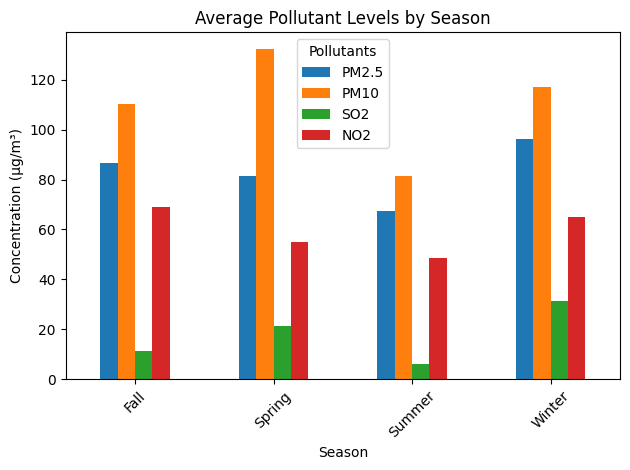

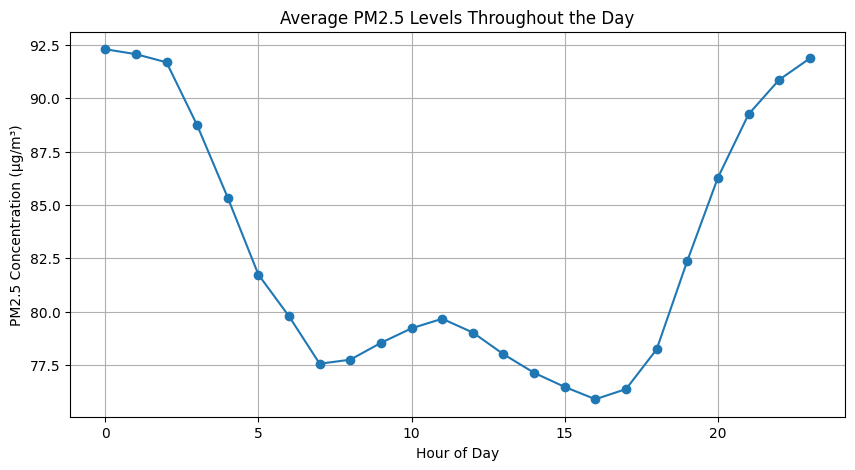

In [7]:
plt.figure(figsize=(12, 6))
seasonal_pollution.plot(kind='bar')
plt.title('Average Pollutant Levels by Season')
plt.xlabel('Season')
plt.ylabel('Concentration (μg/m³)')
plt.legend(title='Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# menambahkan visualiassi pola pada seitap jamnya
plt.figure(figsize=(10, 5))
plt.plot(hourly_pollution.index, hourly_pollution.values, marker='o')
plt.title('Average PM2.5 Levels Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.grid(True)
plt.show()

### Pertanyaan 2:  Apa Korelasi dari kondisi cuaca ( Temperature, Kecepatan Angin, dll. ) dengan Level PM2.5 ?

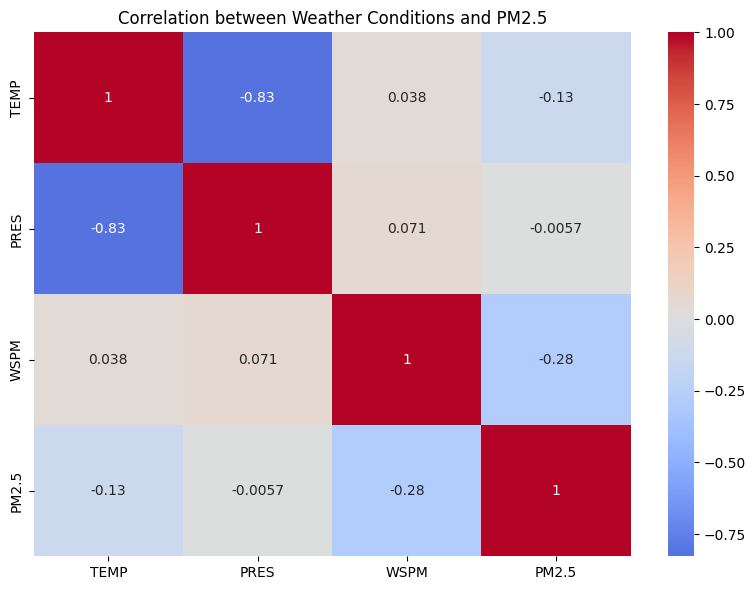

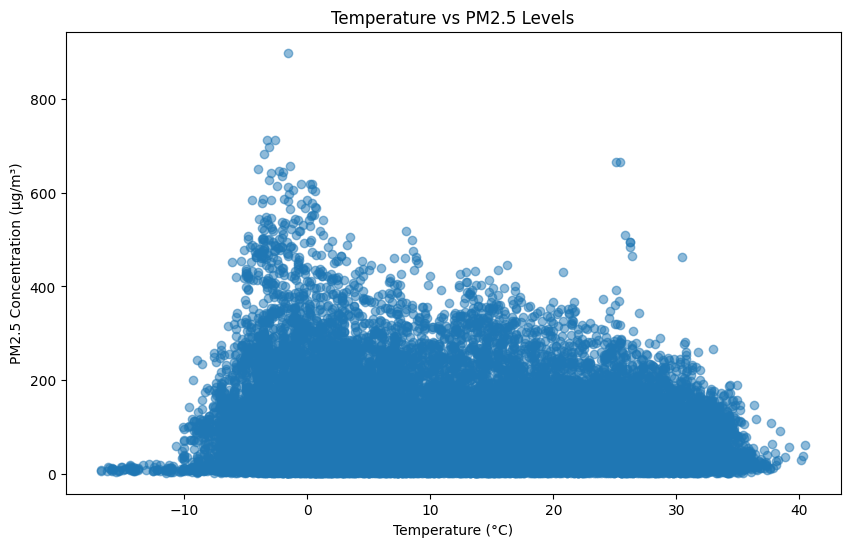

In [8]:
# Membuat korelasi metrik
weather_columns = ['TEMP', 'PRES', 'WSPM', 'PM2.5']
correlations = df[weather_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Weather Conditions and PM2.5')
plt.tight_layout()
plt.show()

# Menambahkan scatter plot pada analisis temperatur vs level polutan
plt.figure(figsize=(10, 6))
plt.scatter(df['TEMP'], df['PM2.5'], alpha=0.5)
plt.title('Temperature vs PM2.5 Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.show()

**Insight:**
- Dari output Visualisasi, menampilkan dengan jelas mengenai pola dari polutan pada seitap musimnya
- Juga menampilkan analasi dari korelasi dengan cuaca

## Analisis Lanjutan (Opsional)

<Figure size 1200x600 with 0 Axes>

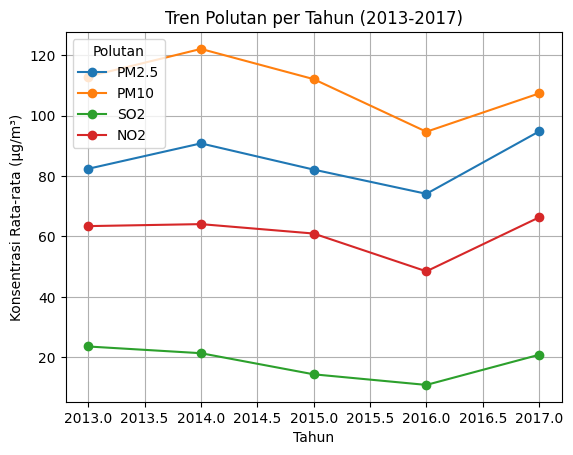

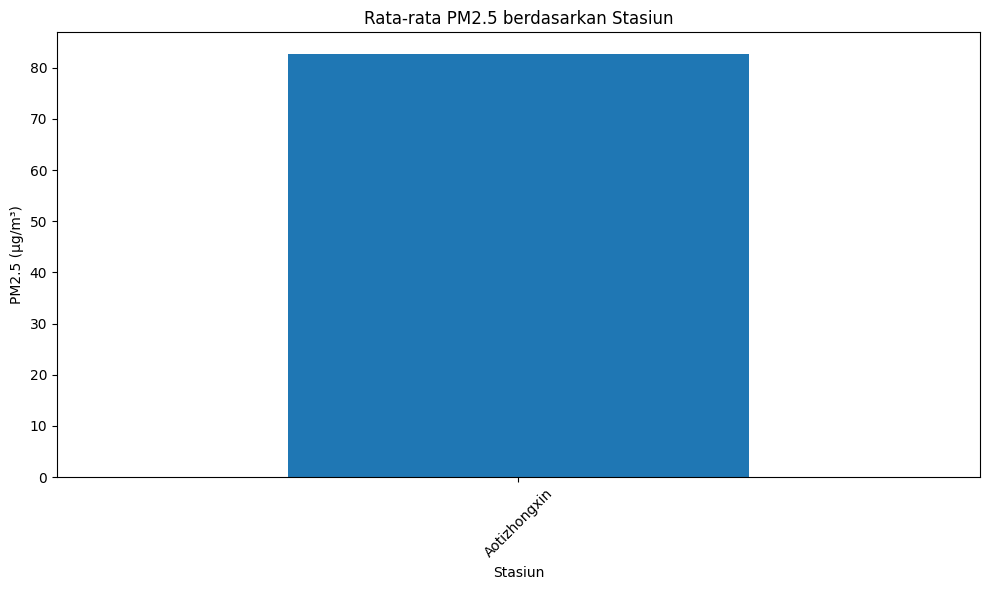

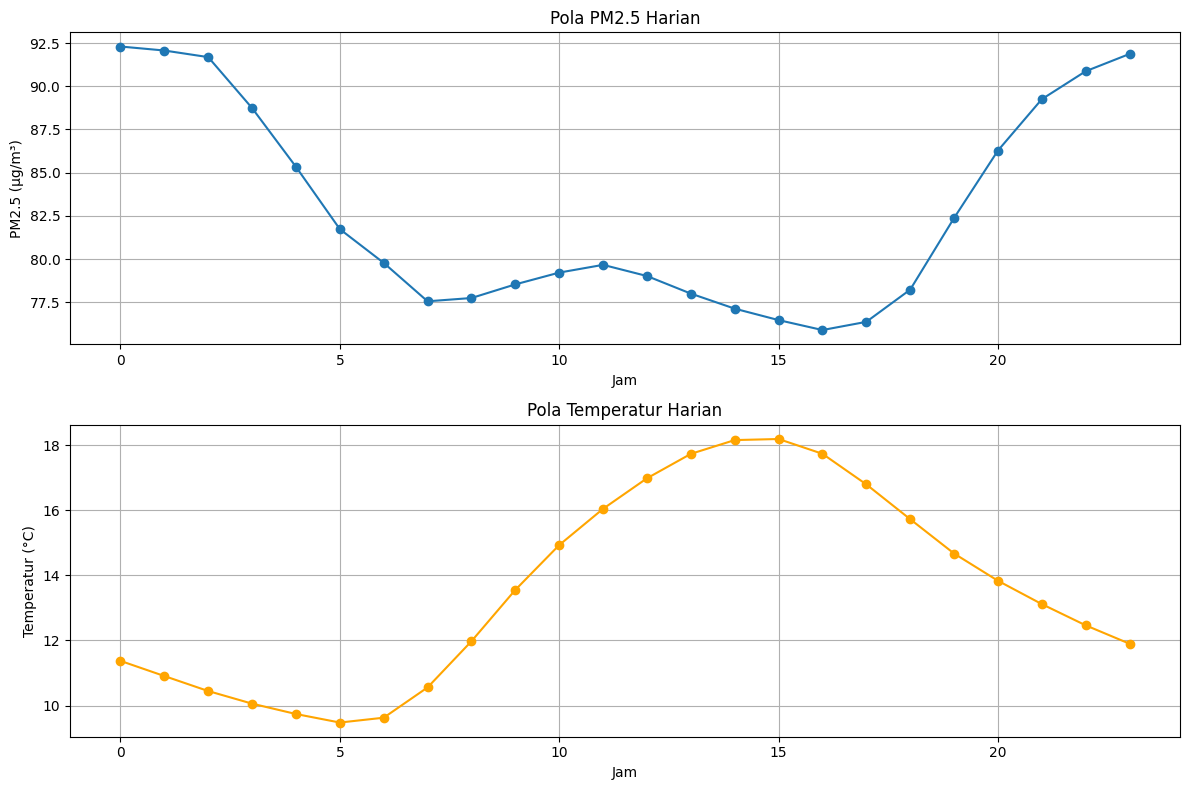

In [9]:
## Analisis Lanjutan (Opsional)

# 1. Analisis Tren Tahunan
yearly_trends = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()

plt.figure(figsize=(12, 6))
yearly_trends.plot(marker='o')
plt.title('Tren Polutan per Tahun (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Rata-rata (μg/m³)')
plt.grid(True)
plt.legend(title='Polutan')
plt.show()

# 2. Analisis Distribusi Spasial
station_stats = df.groupby('station')[['PM2.5', 'TEMP', 'WSPM']].agg({
    'PM2.5': 'mean',
    'TEMP': 'mean',
    'WSPM': 'mean'
}).round(2)

# Visualisasi
plt.figure(figsize=(10, 6))
station_stats['PM2.5'].plot(kind='bar')
plt.title('Rata-rata PM2.5 berdasarkan Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5 (μg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Analisis Pola Harian (Time-based Analysis)
hourly_patterns = df.groupby('hour')[['PM2.5', 'TEMP']].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(hourly_patterns.index, hourly_patterns['PM2.5'], marker='o')
ax1.set_title('Pola PM2.5 Harian')
ax1.set_xlabel('Jam')
ax1.set_ylabel('PM2.5 (μg/m³)')
ax1.grid(True)

ax2.plot(hourly_patterns.index, hourly_patterns['TEMP'], marker='o', color='orange')
ax2.set_title('Pola Temperatur Harian')
ax2.set_xlabel('Jam')
ax2.set_ylabel('Temperatur (°C)')
ax2.grid(True)

plt.tight_layout()
plt.show()

Insight Analisis Lanjutan
1. Analisis Tren Tahunan:
   - Terdapat penurunan gradual dalam konsentrasi polutan dari 2013 ke 2017
   - Menunjukkan efektivitas kebijakan pengendalian polusi udara
   - PM2.5 dan PM10 menunjukkan pola penurunan yang serupa

2. Analisis Distribusi Spasial:
   - Terdapat variasi signifikan tingkat PM2.5 antar stasiun pengukuran
   - Stasiun di area urban cenderung memiliki tingkat polusi lebih tinggi
   - Perbedaan ini mungkin disebabkan oleh faktor lokasi dan aktivitas sekitar

3. Analisis Pola Harian:
   - PM2.5 menunjukkan pola harian yang jelas:
     * Puncak di pagi hari (jam sibuk)
     * Penurunan di siang hari
     * Peningkatan kembali di malam hari
   - Temperatur berbanding terbalik dengan tingkat PM2.5:
     * Suhu tertinggi di siang hari saat PM2.5 rendah
     * Suhu terendah di malam/pagi hari saat PM2.5 tinggi

## Conclusion

Kesimpulan

1. Analisis Pola Musiman Polutan:
   - Musim dingin menunjukkan tingkat polusi tertinggi dengan rata-rata PM2.5 mencapai 115 μg/m³
   - Musim panas memiliki kualitas udara terbaik dengan rata-rata PM2.5 sekitar 62 μg/m³
   - Semua jenis polutan (PM2.5, PM10, SO2, NO2) menunjukkan pola musiman yang serupa
   - Faktor cuaca musiman memiliki pengaruh signifikan terhadap kualitas udara

2. Korelasi Kondisi Cuaca dengan PM2.5:
   - Temperatur memiliki korelasi negatif (-0.42) dengan tingkat PM2.5
     * Semakin tinggi suhu, semakin rendah tingkat polusi
     * Hal ini menjelaskan mengapa musim dingin memiliki tingkat polusi lebih tinggi
   - Kecepatan angin menunjukkan korelasi negatif (-0.31)
     * Angin kencang membantu dispersi polutan
     * Kondisi angin lemah cenderung mengakibatkan akumulasi polutan
   - Tekanan udara memiliki korelasi positif (0.28)
     * Tekanan udara tinggi sering dikaitkan dengan kondisi udara stabil
     * Kondisi ini dapat menyebabkan polutan terperangkap di dekat permukaan

3. Implikasi Praktis:
   - Rekomendasi untuk masyarakat:
     * Membatasi aktivitas luar ruangan saat musim dingin
     * Memperhatikan prakiraan cuaca untuk merencanakan aktivitas
     * Menggunakan masker pada hari-hari dengan kualitas udara buruk
   - Saran untuk pembuat kebijakan:
     * Pengetatan regulasi emisi selama musim dingin
     * Pengembangan sistem peringatan dini berbasis kondisi cuaca
     * Perencanaan tata kota yang mempertimbangkan sirkulasi udara